In [2]:
# Python
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('./gs/탄산음료.csv')

## Adjusting trend flesxibility
overfit 0.08
underfit 0.05
default 0.05


트렌드 유연성 조정

In [4]:
m = Prophet(changepoint_prior_scale=0.09)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [5]:
# Python
# make_future_dataframe->periods 설정,
# predict를 통해 예측 진행 - periods=365는 향후 365일을 예측하겠다는 뜻
future = m.make_future_dataframe(periods=365)
future.tail(3)

ds
1458 2019-12-29
1459 2019-12-30
1460 2019-12-31

In [6]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

ds         yhat   yhat_lower  yhat_upper
1459 2019-12-30 -2965.312462 -5651.297190 -259.924326
1460 2019-12-31 -2662.427967 -5099.064787 -261.095425

In [7]:
forecast.head(1)

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2016-01-01  7876.211902  5038.919875  8916.635416  7876.211902  7876.211902   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -870.403965           -870.403965           -870.403965  753.732019   

   weekly_lower  weekly_upper       yearly  yearly_lower  yearly_upper  \
0    753.732019    753.732019 -1624.135985  -1624.135985  -1624.135985   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  7005.807936

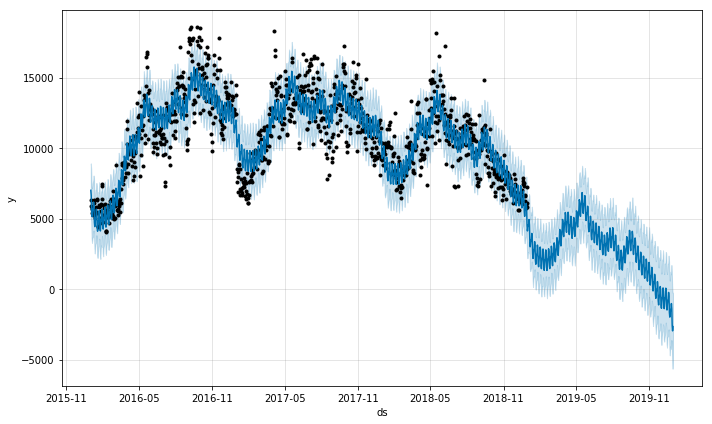

In [8]:
# Python
fig1 = m.plot(forecast)

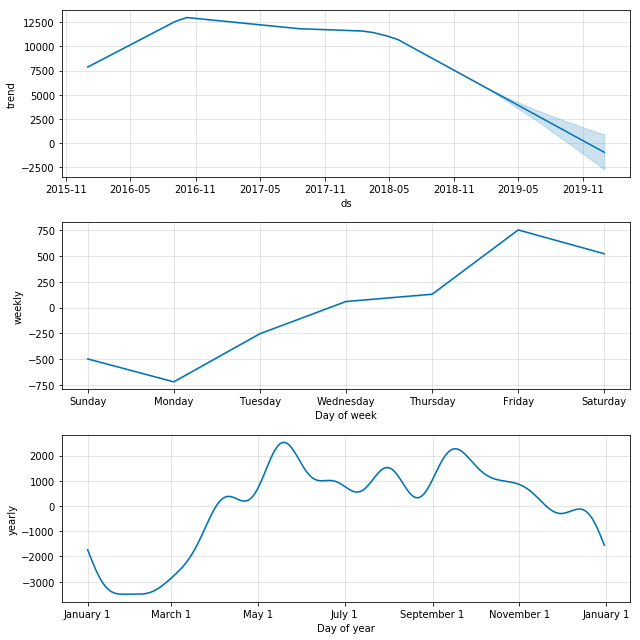

In [9]:
# Python
# 위 그래프를 통해 가격에 대한 향휴 365일의 예측값을 확인
# 중간 그래프를 통해 큰 틀에서의 트랜드를, 
# 아래 그래프를 통해 최근 1년동안의 트랜드를 파악할수 있음 
fig2 = m.plot_components(forecast)

In [17]:
# Python
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [19]:
m

In [18]:
pre = df['y']-forecast['yhat']

In [20]:
pre.mean()

-0.12575090216849302

In [22]:
1+pre.mean()

0.874249097831507

# Automatic changepoint detection in Prophet
자동으로 특정 trend change point를 찾아줌

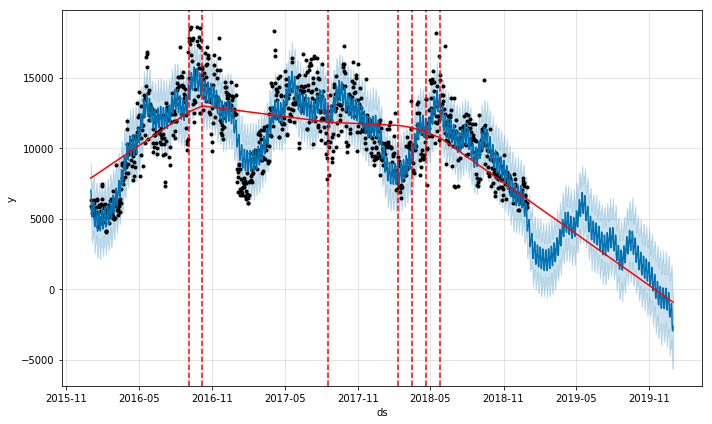

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Additional regressors
모델을 선형적으로 예측값을 증가

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



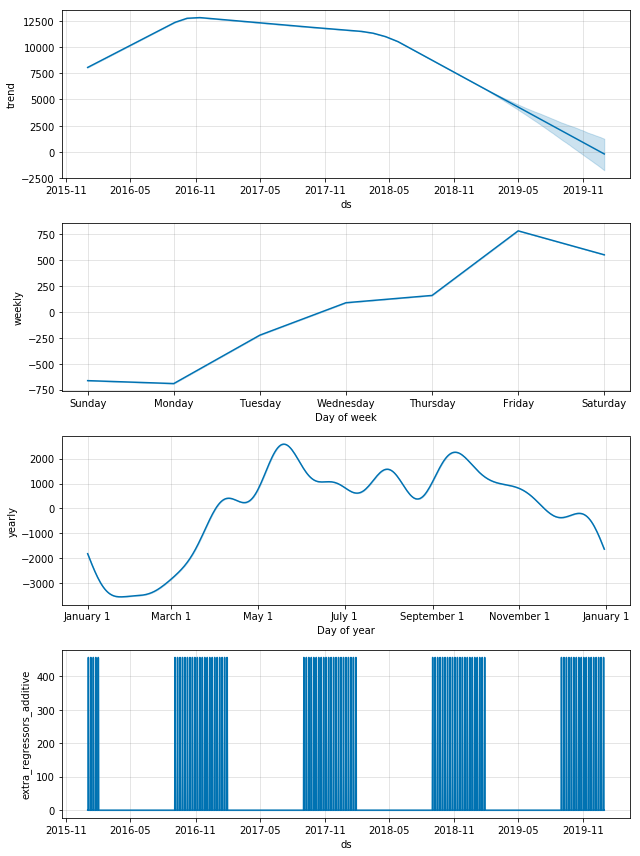

In [16]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

# Fourier Order for Seasonalities
계절성 추가 

In [ ]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

In [ ]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [ ]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)